A graph has edges as pairs of 2d points. The edges have no "order" but for my bezier curve implementation idea I want to know where the "start(s)" and "end(s)" are to create every single "path" of edges we want to draw a curve on.

Of course gonna start with only 1 path.

To properly set up paths, I will want functions to create maps of each point going out, and each point coming in. So the starting edge will have nothing coming in, and the ending edge will have nothing going out

[(a, b), (b, c), (c, d)] <- wont move, base "frame"
[(a', b'), (b', c')] <- a' is a point that moves along the (a, b) edge, b' prime over (b, c), and c' over (c,d)
                        also note that they start at a, b, and cs initial positions
[(a'', b'')] <- a'' moves along the (a', b') edge, and b'' moves along (b', c') edge
final one is a single point a''' which is also the turtle that draws along the (a'', b'') edge

I want to create "path" classes which make it straightforward to move along the contained edges

In [1]:
import math

import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return f'Point ({self.x}, {self.y})'

In [3]:
# Used to calculate the length of an edge
def euclidean_distance(point1, point2):
    return math.sqrt((point2.x - point1.x)**2  + (point2.y - point1.y)**2)

In [4]:
class Edge:
    def __init__(self, start_point, end_point):
        self.start = start_point
        self.end = end_point
        
    def __repr__(self):
        return f'Edge [{self.start}, {self.end}]'
        
    def point_at(self, t):
        # This is the direction from the start to the end points
        angle_of_approach = math.atan2(self.end.y - self.start.y, self.end.x - self.start.x)
        
        # Line lenght is important so we know how far towards the end to move
        line_length = euclidean_distance(self.start, self.end)
        
        new_x = math.cos(angle_of_approach) * line_length * t
        new_y = math.sin(angle_of_approach) * line_length * t
        
        # Create a new point which is the original plus the offset along the angle_of_approach
        return Point(self.start.x + new_x, self.start.y + new_y)

In [5]:
def drawn_point(edges, t):
    # The base case is when we are on the smallest edge we return a single point to "draw"
    if len(edges) == 1:
        return edges[0].point_at(t)
    
    # Create a new list of new edges by finding the point_at(t) for each edge pair
    # Then recursively call this function until it gets to the end
    return drawn_point([Edge(e1.point_at(t), e2.point_at(t)) for (e1, e2) in zip(edges, edges[1:])], t)

In [6]:
def get_bezier_curve(pairs):
    edges = [Edge(Point(*x), Point(*y)) for (x, y) in pairs]
    xs = [drawn_point(edges, t/100) for t in range(0, 100)]
    return [p.x for p in xs], [p.y for p in xs]

In [7]:
# I wrote it as a list of points so its easy to both get the curve and plot the original
points = [(3, 0), (2, 10),  (10, 10), (30, 0), (35, 15)]

xs, ys = get_bezier_curve(zip(points, points[1:]))

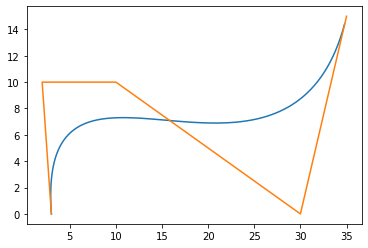

In [8]:
# Plot both original and bezier curve

plt.plot(xs, ys)
# Get only the "x" and "y" from the points (its what matplotlib wants)
plt.plot([p[0] for p in points], [p[1] for p in points])